<a href="https://colab.research.google.com/github/SamuelRaj0911/ML-Lab/blob/main/ML_2_2348550.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/customer_support_tickets.csv')

In [ ]:
df.head(15)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
5,6,Rebecca Fleming,sheenasmith@example.com,53,Male,Microsoft Office,2020-07-28,Cancellation request,Payment issue,I'm facing a problem with my {product_purchase...,Open,NaN,Low,Social media,NaN,NaN,NaN
6,7,Jacqueline Wright,donaldkeith@example.org,24,Other,Microsoft Surface,2020-02-23,Product inquiry,Refund request,I'm unable to access my {product_purchased} ac...,Open,NaN,Critical,Social media,NaN,NaN,NaN
7,8,Denise Lee,joelwilliams@example.com,23,Male,Philips Hue Lights,2020-08-09,Refund request,Battery life,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Social media,NaN,NaN,NaN
8,9,Nicolas Wilson,joshua24@example.com,60,Other,Fitbit Versa Smartwatch,2020-07-16,Technical issue,Installation support,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Low,Social media,2023-06-01 10:32:47,NaN,NaN
9,10,William Dawson,clopez@example.com,27,Male,Dyson Vacuum Cleaner,2020-03-06,Refund request,Payment issue,My {product_purchased} is making strange noise...,Pending Customer Response,NaN,Critical,Phone,2023-06-01 09:25:48,NaN,NaN


In [ ]:
df=df.drop(columns='Customer Name',axis=1)
df=df.drop(columns='Customer Email',axis=1)

df=df.drop(columns='Date of Purchase',axis=1)

df=df.drop(columns='Ticket Description',axis=1)


df=df.drop(columns='First Response Time',axis=1)

df=df.drop(columns='Time to Resolution',axis=1)

df=df.drop(columns='Resolution',axis=1)

In [ ]:
df.head(10)

,Ticket ID,Customer Age,Customer Gender,Product Purchased,Ticket Type,Ticket Subject,Ticket Status,Ticket Priority,Ticket Channel,Customer Satisfaction Rating
0,1,32,Other,GoPro Hero,Technical issue,Product setup,Pending Customer Response,Critical,Social media,NaN
1,2,42,Female,LG Smart TV,Technical issue,Peripheral compatibility,Pending Customer Response,Critical,Chat,NaN
2,3,48,Other,Dell XPS,Technical issue,Network problem,Closed,Low,Social media,3.0
3,4,27,Female,Microsoft Office,Billing inquiry,Account access,Closed,Low,Social media,3.0
4,5,67,Female,Autodesk AutoCAD,Billing inquiry,Data loss,Closed,Low,Email,1.0
5,6,53,Male,Microsoft Office,Cancellation request,Payment issue,Open,Low,Social media,NaN
6,7,24,Other,Microsoft Surface,Product inquiry,Refund request,Open,Critical,Social media,NaN
7,8,23,Male,Philips Hue Lights,Refund request,Battery life,Open,Critical,Social media,NaN
8,9,60,Other,Fitbit Versa Smartwatch,Technical issue,Installation support,Pending Customer Response,Low,Social media,NaN
9,10,27,Male,Dyson Vacuum Cleaner,Refund request,Payment issue,Pending Customer Response,Critical,Phone,NaN


In [ ]:

for col in df.columns:
  df[col]=df[col].fillna(df[col].mode()[0])

In [ ]:

from sklearn.preprocessing import LabelEncoder
for col in df.columns[2:]:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])

In [ ]:
df.head(10)

,Ticket ID,Customer Age,Customer Gender,Product Purchased,Ticket Type,Ticket Subject,Ticket Status,Ticket Priority,Ticket Channel,Customer Satisfaction Rating
0,1,32,2,16,4,13,2,0,3,2
1,2,42,0,21,4,10,2,0,0,2
2,3,48,2,10,4,8,0,2,3,2
3,4,27,0,25,0,0,0,2,3,2
4,5,67,0,5,0,3,0,2,1,0
5,6,53,1,25,1,9,1,2,3,2
6,7,24,2,26,2,14,1,0,3,2
7,8,23,1,32,3,1,1,0,3,2
8,9,60,2,13,4,7,2,2,3,2
9,10,27,1,11,3,9,2,0,2,2


In [ ]:
df.describe

<bound method NDFrame.describe of       Ticket ID  Customer Age  Customer Gender  Product Purchased  \
0             1            32                2                 16   
1             2            42                0                 21   
2             3            48                2                 10   
3             4            27                0                 25   
4             5            67                0                  5   
...         ...           ...              ...                ...   
8464       8465            22                0                 20   
8465       8466            27                0                  7   
8466       8467            57                0                 15   
8467       8468            54                1                 33   
8468       8469            53                2                 32   

      Ticket Type  Ticket Subject  Ticket Status  Ticket Priority  \
0               4              13              2                0   

In [ ]:
df.info

<bound method DataFrame.info of       Ticket ID  Customer Age  Customer Gender  Product Purchased  \
0             1            32                2                 16   
1             2            42                0                 21   
2             3            48                2                 10   
3             4            27                0                 25   
4             5            67                0                  5   
...         ...           ...              ...                ...   
8464       8465            22                0                 20   
8465       8466            27                0                  7   
8466       8467            57                0                 15   
8467       8468            54                1                 33   
8468       8469            53                2                 32   

      Ticket Type  Ticket Subject  Ticket Status  Ticket Priority  \
0               4              13              2                0   
1

In [ ]:
df.isnull().sum()

Ticket ID                       0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Ticket Type                     0
Ticket Subject                  0
Ticket Status                   0
Ticket Priority                 0
Ticket Channel                  0
Customer Satisfaction Rating    0
dtype: int64

<Axes: >

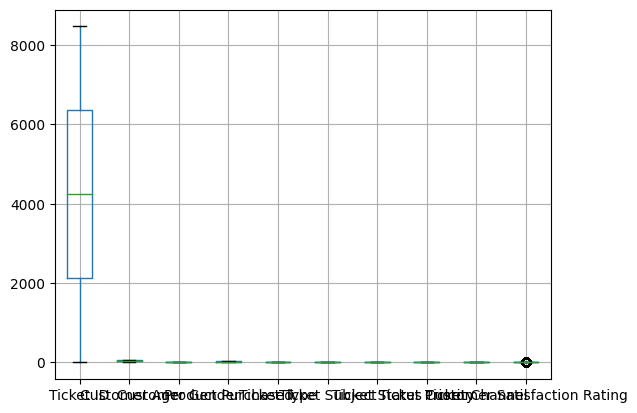

In [ ]:
df.boxplot()

In [ ]:
for col in df.columns:
  df[col]=df[col].fillna(df[col].mode()[0])

In [ ]:
label1=['18-25', '26-35', '36-45','46-55','56-65','66-75','76-85','86-92']

In [ ]:
df['Customer Age'].head()

0    32
1    42
2    48
3    27
4    67
Name: Customer Age, dtype: object

In [ ]:
bins1 = [ 18, 26,36, 46,56,66,76,86,92 ]
df['bin_cut_manual'] = pd.cut(df['Customer Age'] , bins=bins1, labels=label1)
plt.figure(figsize=(8,8))
sns.barplot(y=df['bin_cut_manual'].index,x=df['bin_cut_manual'].values)
plt.show()


TypeError: ignored

In [ ]:
df.head()

,Ticket ID,Customer Age,Customer Gender,Product Purchased,Ticket Type,Ticket Subject,Ticket Status,Ticket Priority,Ticket Channel,Customer Satisfaction Rating,bin_cut_manual
0,1,32,2,16,4,13,2,0,3,2,26-35
1,2,42,0,21,4,10,2,0,0,2,36-45
2,3,48,2,10,4,8,0,2,3,2,46-55
3,4,27,0,25,0,0,0,2,3,2,26-35
4,5,67,0,5,0,3,0,2,1,0,66-75


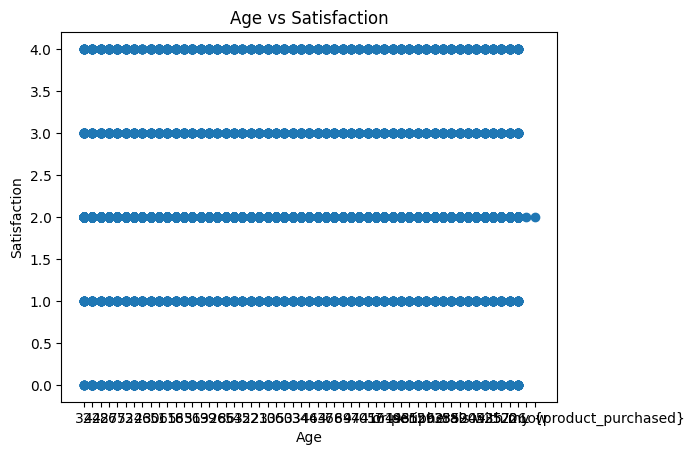

In [ ]:
plt.scatter(df['Customer Age'], df['Customer Satisfaction Rating'])
plt.xlabel('Age')
plt.ylabel('Satisfaction')
plt.title('Age vs Satisfaction')
plt.show()

In [ ]:
covariance = np.cov(df['Customer Age'], df['Customer Satisfaction Rating'])
print("Covariance Matrix:")
print(covariance)
sns.heatmap(covariance, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12}, xticklabels=data.columns, yticklabels=data.columns)
plt.title('Covariance Matrix Heatmap')
plt.show()


TypeError: ignored

In [ ]:
repeat_purchase = np.random.choice(['Yes', 'No'], size=8469)
data = pd.DataFrame({'CustomerGender': df['Customer Gender'], 'RepeatPurchase': repeat_purchase})
contingency_table = pd.crosstab(data['CustomerGender'], data['RepeatPurchase'])
colors = ['violet', 'skyblue']
contingency_table.plot(kind='bar', stacked=True, color=colors)
plt.title('Association between Customer Gender and Repeat Purchase')
plt.xlabel('Customer Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Repeat Purchase')
plt.show()

ValueError: ignored